In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import time
from functools import reduce
import emcee
import corner
sys.path.append("../gaia_tools/")
import data_analysis
import transformation_constants
import covariance_generation
from import_functions import import_data

In [2]:
def plot_walkers(reader, theta_labels, burn_in = 0, plot_name = 'Unnamed', is_save=False):
    
    samples_data = reader.get_chain(discard = burn_in)
    print("Sampler shape: {}".format(samples_data.shape))

    num_parameters = len(theta_labels)

    fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

    for i in range(num_parameters):
        ax = axes[i]
        ax.plot(samples_data[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples_data))
        
        ax.set_ylabel(theta_labels[i], fontsize=16)
        ax.yaxis.set_label_coords(-0.1, 0.5)      
        ax.tick_params(axis='both', which='major', labelsize=16)
        axes[-1].set_xlabel("Step number", labelpad = 20, fontsize=18)

    if(is_save): 
        plt.savefig(plot_name, dpi=300)
    plt.show()

def plot_corner(reader, theta_labels, burn_in = 0, plot_name = 'Unnamed', is_save=False):
    flatchain = reader.get_chain(flat=True, discard = burn_in)
    print(flatchain.shape)

    fig = corner.corner(flatchain, 
                        labels=theta_labels,
                        levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                        plot_datapoints = False,
                        plot_density = False,
                        fill_countours = False,
                        smooth = 0.5,
                        quantiles=[0.16, 0.5, 0.84],
                        show_titles=True, 
                        title_kwargs={"fontsize": 11})

    if(is_save): 
        plt.savefig(plot_name, dpi=300)
    plt.show()

# Checking results for a different prior range

In [3]:
filename = "/home/sven/repos/gaia-tools/out/mcmc_sampler/false_prior/SP_sampler_falseprior_2022-05-13-13-42-02_zlim50_minrlim5000_maxrlim12000.h5"
reader = emcee.backends.HDFBackend(filename, read_only=True)

In [4]:
xdf = [num for num in range(0, reader.get_chain().shape[2], 1)]
theta_labels = ['$V_{c%s}$' %str(i+1) for i in xdf]
theta_labels[-1] = '$V_\odot$'

Sampler shape: (500, 60, 6)


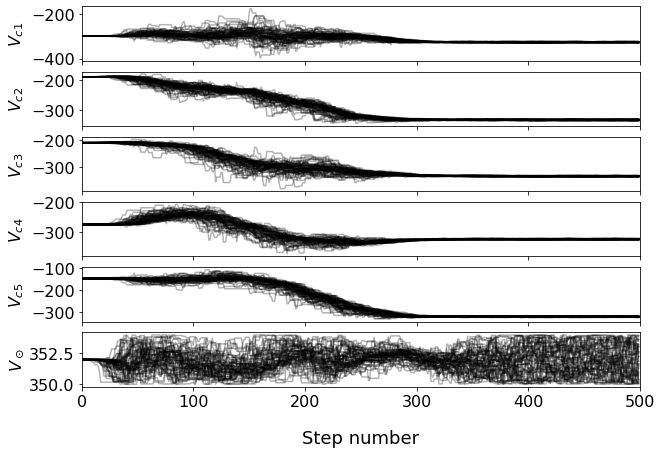

In [6]:
plot_name = '/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1905_2022/Walkers_FalsePrior.png'
plot_walkers(reader, theta_labels, plot_name=plot_name, is_save=True)

(12000, 6)


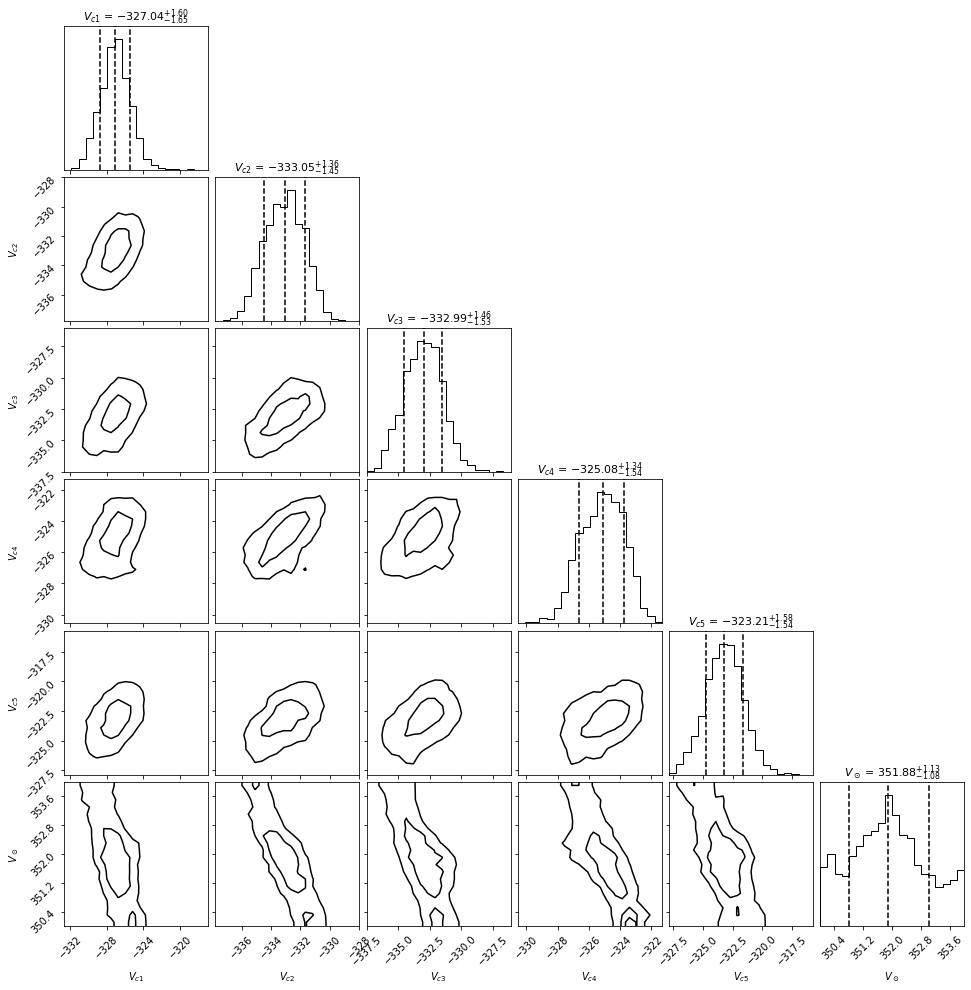

In [7]:
plot_name = '/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1905_2022/Corner_FalsePrior.png'
plot_corner(reader, theta_labels, 300, plot_name=plot_name, is_save=True)

# Increased binning

In [8]:
filename = "/home/sven/repos/gaia-tools/out/mcmc_sampler/modified_binning/sampler_larger_binning_10x1_2022-05-17-11-49-12_zlim50_minrlim5000_maxrlim12000.h5"
reader = emcee.backends.HDFBackend(filename, read_only=True)

xdf = [num for num in range(0, reader.get_chain().shape[2], 1)]
theta_labels = ['$V_{c%s}$' %str(i+1) for i in xdf]
theta_labels[-1] = '$V_\odot$'

Sampler shape: (1500, 60, 11)


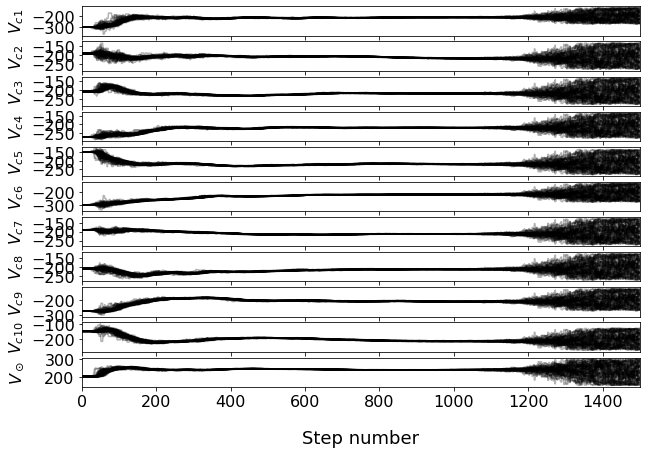

In [9]:
plot_name = '/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1905_2022/Walkers_Bins10x1.png'
plot_walkers(reader, theta_labels, 0, plot_name=plot_name, is_save=True)

(18000, 11)


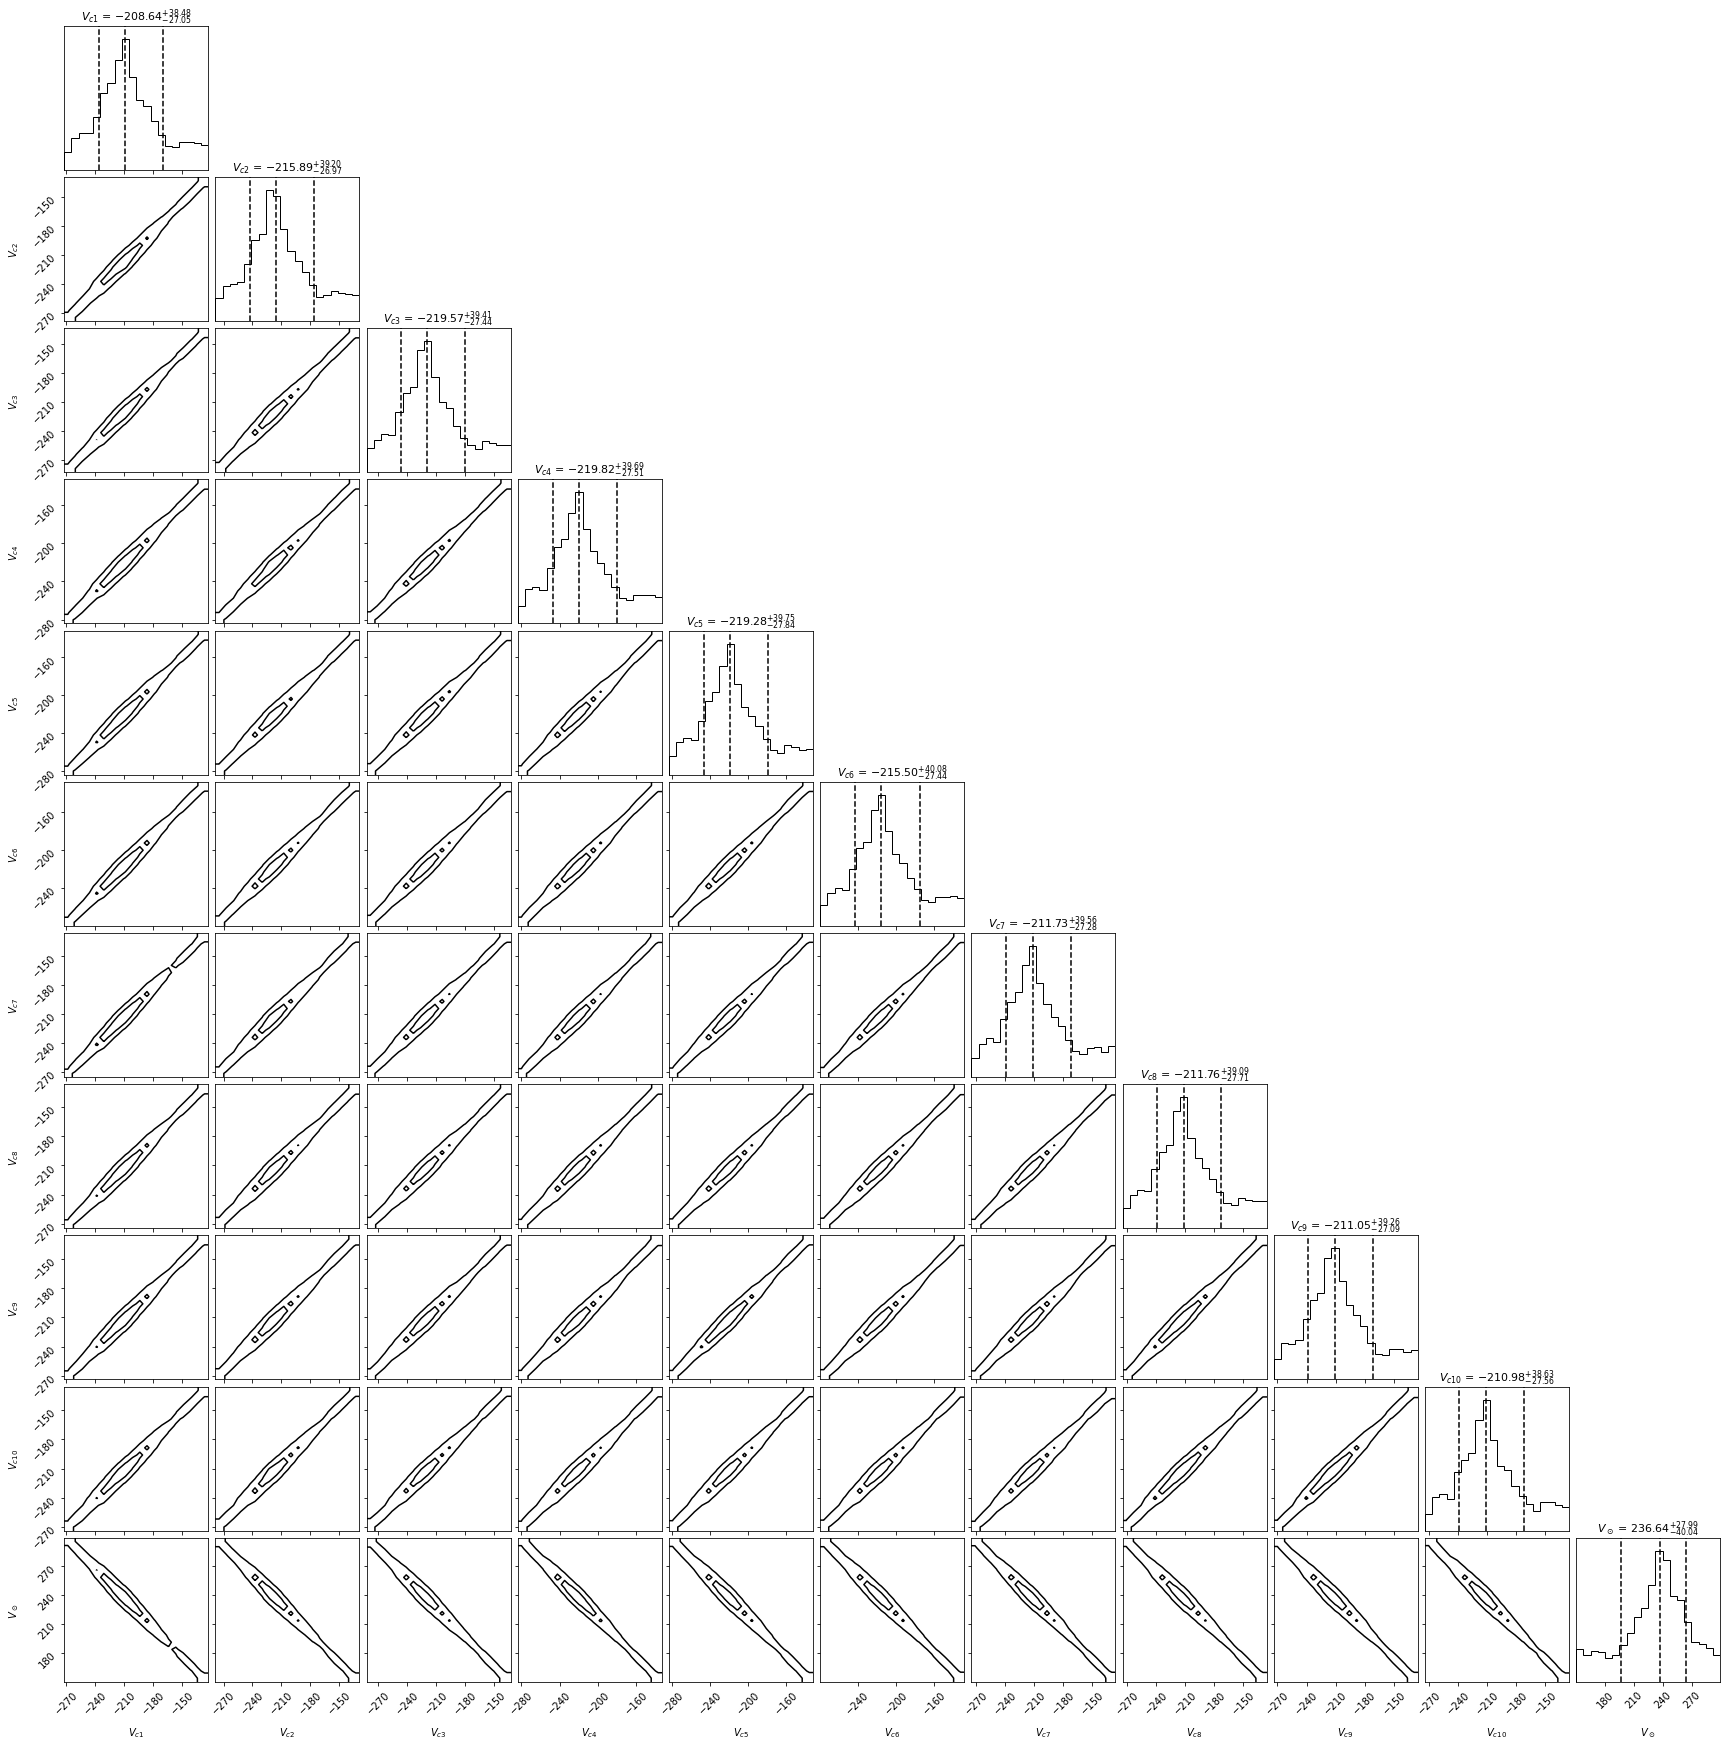

In [10]:
plot_name = '/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1905_2022/Corner_Bins10x1_Burnin1200.png'
plot_corner(reader, theta_labels, 1200, plot_name=plot_name, is_save=True)

# Old plots

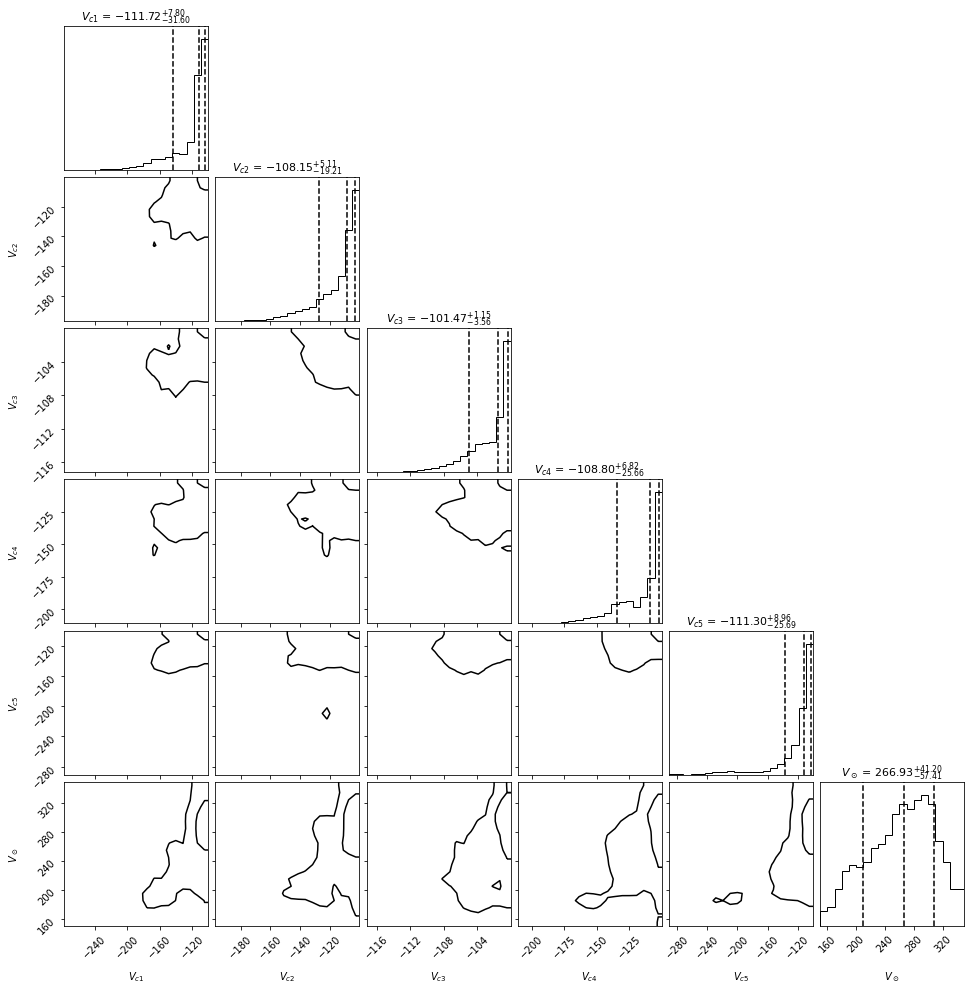

In [11]:
# Flattens the result: nwalkers x steps
flatchain = reader.get_chain(flat=True, discard = 200)
'''
fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    truths=[transformation_constants.R_0, 
                            transformation_constants.Z_0, 
                            transformation_constants.V_SUN[0][0], 
                            transformation_constants.V_SUN[1][0], 
                            transformation_constants.V_SUN[2][0]],
                    
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_kwargs={"fontsize": 12});
'''


fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, 
                    title_kwargs={"fontsize": 11});

#fig.suptitle('MCMC sampler corner plot', fontsize=28, x=0.65, y= 0.9)
#plt.savefig("Corner_Plt_05052021", dpi=300)

#plt.savefig("Corner_Plot", dpi=300)
plt.show()

In [30]:
from IPython.display import display, Math
#theta_labels = ['U_{sun}','V_{sun}']
for i in range(len(theta_labels)):
    mcmc = np.percentile(flatchain[:, i], [16, 50, 84])
    
    q = np.diff(mcmc)
    
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], theta_labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Test with smaller sample

In [5]:
filename = '/home/sven/repos/gaia-tools/out/mcmc_sampler/sampler_2022-05-01-19-55-51.h5'
reader = emcee.backends.HDFBackend(filename, read_only=True)
samples_data = reader.get_chain()
print(samples_data.shape)
xdf = [num for num in range(0, samples_data.shape[2], 1)]
theta_labels = ['$V_{c%s}$' %str(i+1) for i in xdf]
theta_labels[-1] = '$V_{\odot,TOT}$'

(500, 60, 6)


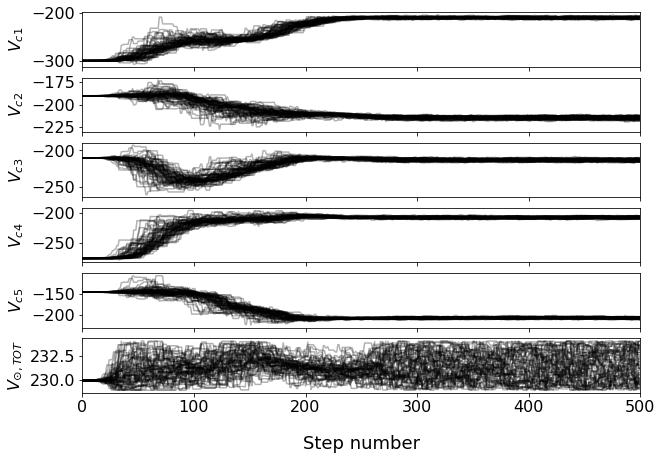

In [6]:
num_parameters = len(theta_labels)

fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

for i in range(num_parameters):
    ax = axes[i]
    ax.plot(samples_data[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_data))
    
    ax.set_ylabel(theta_labels[i], fontsize=16)
    ax.yaxis.set_label_coords(-0.1, 0.5)      
    ax.tick_params(axis='both', which='major', labelsize=16)
    axes[-1].set_xlabel("Step number", labelpad = 20, fontsize=18)
    
#plt.savefig("MCMC_Walkers", dpi=300)
plt.show()

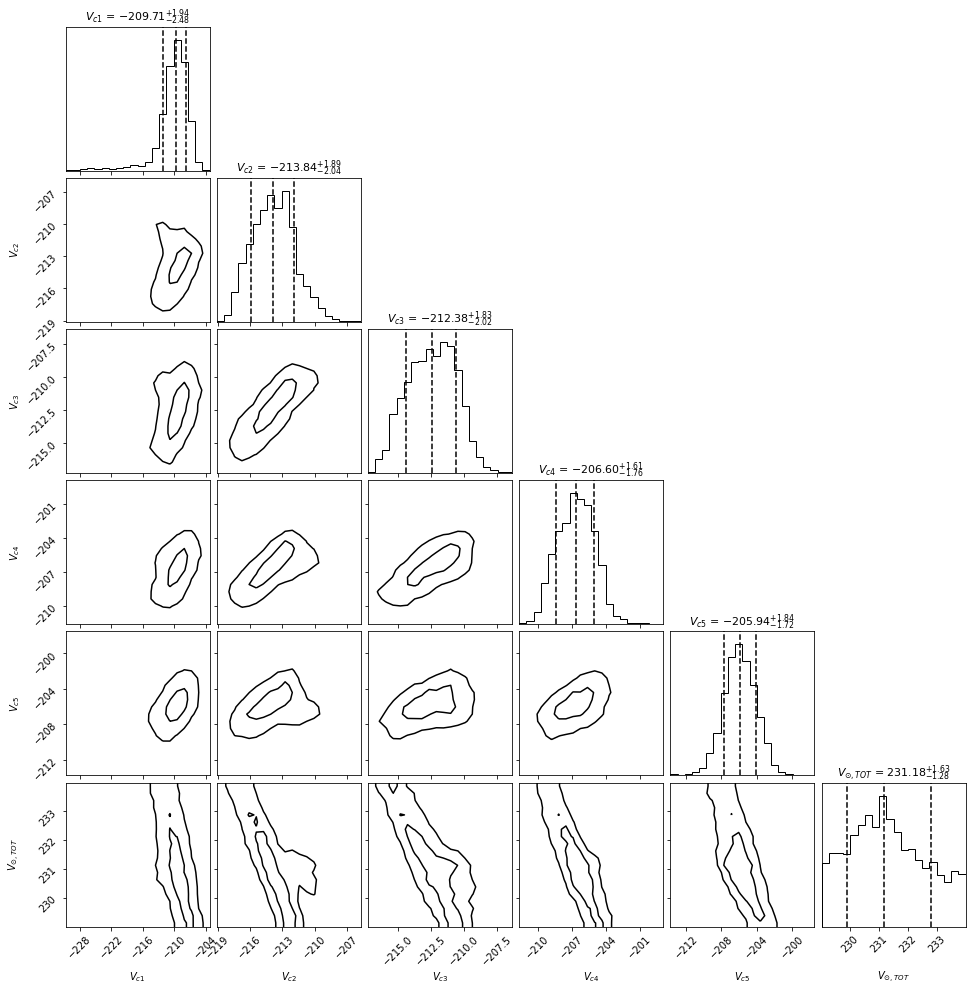

In [7]:
# Flattens the result: nwalkers x steps
flatchain = reader.get_chain(flat=True, discard = 200)

fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, 
                    title_kwargs={"fontsize": 11});

#fig.suptitle('MCMC sampler corner plot', fontsize=28, x=0.65, y= 0.9)
#plt.savefig("Corner_Plt_05052021", dpi=300)

#plt.savefig("Corner_Plot", dpi=300)
plt.show()

## Test with unoptimized code

In [2]:
filename = '/home/sven/repos/gaia-tools/out/mcmc_sampler/sampler_2022-05-01-20-19-07.h5'
reader = emcee.backends.HDFBackend(filename, read_only=True)
samples_data = reader.get_chain()
print(samples_data.shape)
xdf = [num for num in range(0, samples_data.shape[2], 1)]
theta_labels = ['$V_{c%s}$' %str(i+1) for i in xdf]
theta_labels[-1] = '$V_{\odot,TOT}$'

(2500, 60, 6)


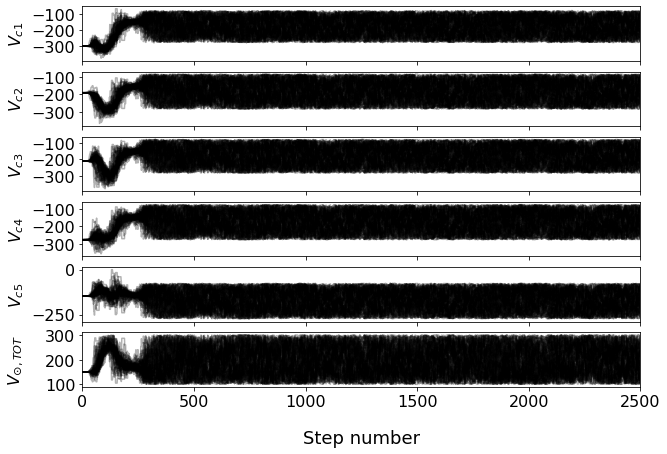

In [3]:
num_parameters = len(theta_labels)

fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

for i in range(num_parameters):
    ax = axes[i]
    ax.plot(samples_data[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_data))
    
    ax.set_ylabel(theta_labels[i], fontsize=16)
    ax.yaxis.set_label_coords(-0.1, 0.5)      
    ax.tick_params(axis='both', which='major', labelsize=16)
    axes[-1].set_xlabel("Step number", labelpad = 20, fontsize=18)
    
#plt.savefig("MCMC_Walkers", dpi=300)
plt.show()

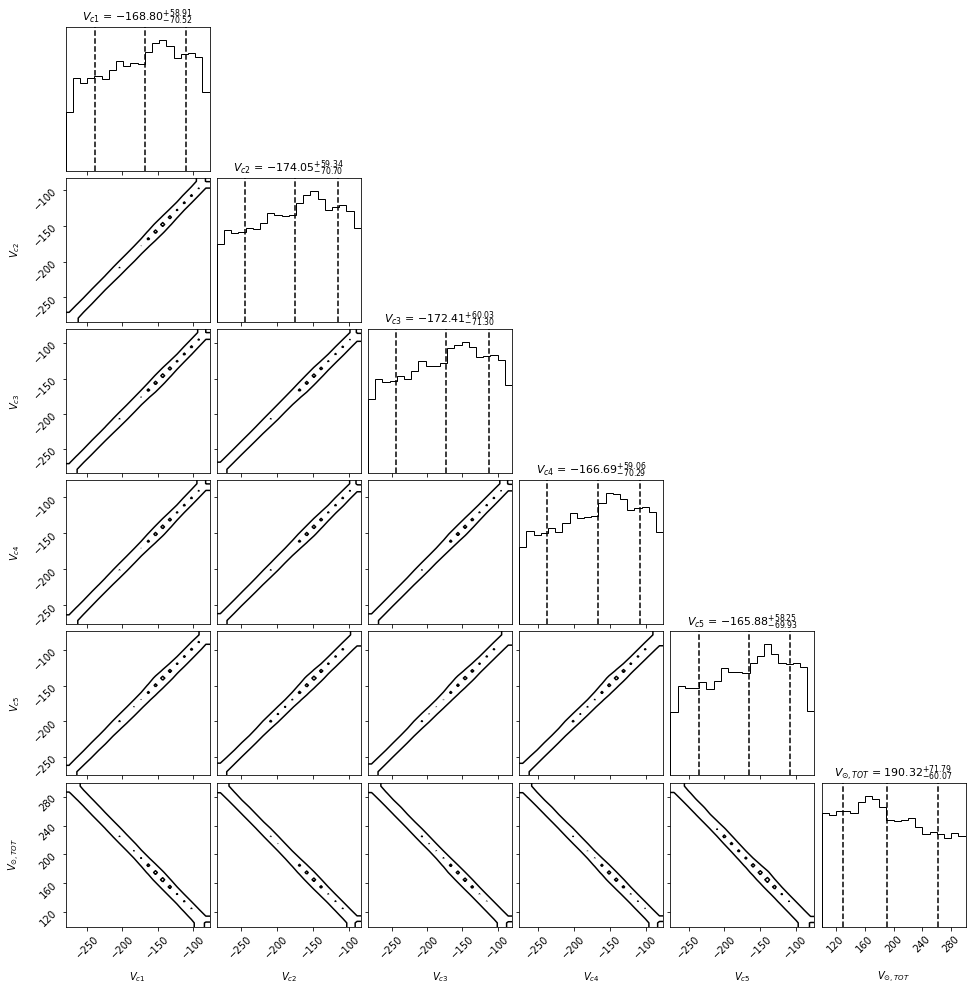

In [4]:
# Flattens the result: nwalkers x steps
flatchain = reader.get_chain(flat=True, discard = 200)

fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, 
                    title_kwargs={"fontsize": 11});

#fig.suptitle('MCMC sampler corner plot', fontsize=28, x=0.65, y= 0.9)
#plt.savefig("Corner_Plt_05052021", dpi=300)

#plt.savefig("Corner_Plot", dpi=300)
plt.show()

# Plots for 13.05.2022 Meeting

$r \in R_0 \pm 1500\, pc$  
$z \in [-50, 50]\, pc$

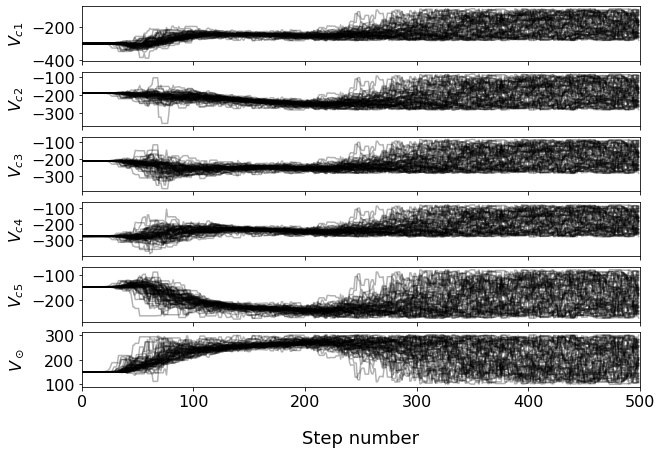

In [17]:
filename = "/home/sven/repos/gaia-tools/out/mcmc_sampler/results_different_slices/LP_sampler_2022-05-11-18-32-46_zlim50_rlim6678_9678.h5"
reader = emcee.backends.HDFBackend(filename, read_only=True)

plot_name = "/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1305_2022/large_prior_pm1500_-50_50.png"
plot_walkers(reader, theta_labels, plot_name=plot_name, is_save=False)

(12000, 6)


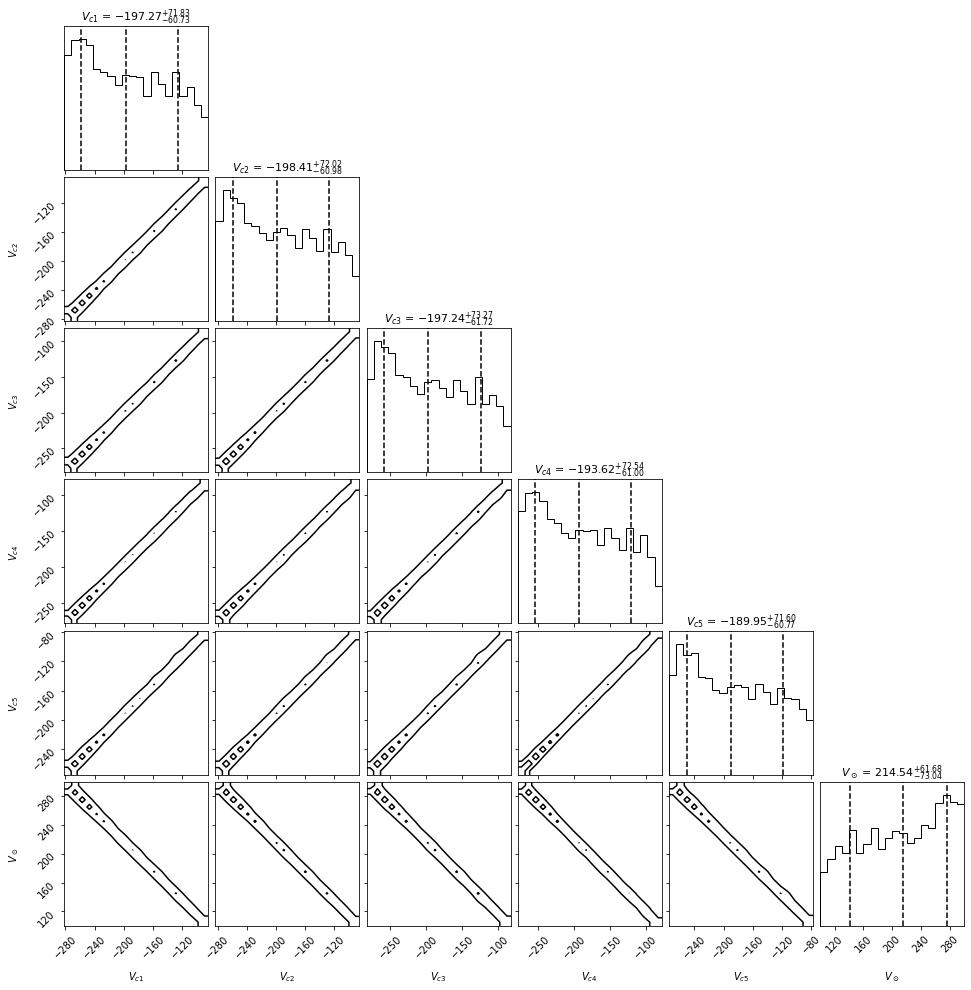

In [19]:
plot_name = "/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1305_2022/corner_large_prior_pm1500_-50_50.png"
plot_corner(reader, theta_labels, burn_in=300, plot_name=plot_name, is_save=True)

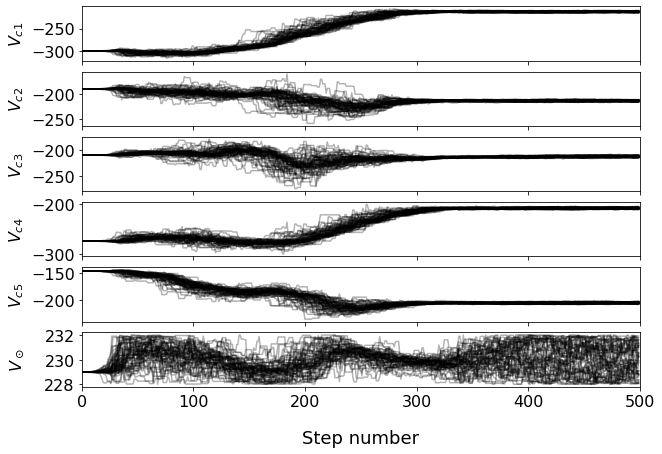

In [10]:
filename = "/home/sven/repos/gaia-tools/out/mcmc_sampler/results_different_slices/SP_sampler_2022-05-11-22-59-23_zlim50_rlim6678_9678.h5"
reader = emcee.backends.HDFBackend(filename, read_only=True)

plot_name = "/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1305_2022/small_prior_pm1500_-50_50.png"
plot_walkers(reader, theta_labels, plot_name=plot_name, is_save=Fa)

In [ ]:
plot_name = "/home/sven/repos/gaia-tools/out/mcmc_plots/plots_meeting_1305_2022/corner_small_prior_pm1500_-50_50.png"
plot_corner(reader, theta_labels, burn_in=300, plot_name=plot_name, is_save=False)